# YouTube Video Title Sentiment Analysis

Data is available at: https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset

# Ankit Modi

# Data Analysis

### Read all csv files

In [97]:
# Import libraries
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from IPython.display import HTML
import string

In [2]:
tf.__version__   # TensorFlow version

'2.15.0'

In [3]:
# Get data directory
pwd=os.getcwd()
data_dir=pwd+"/archive"
data_dir

'c:\\Users\\ankit\\OneDrive\\Python\\CSCE633\\Present/archive'

In [4]:
# Convert into windows path. This makes it easier to fetch the .csv files
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('c:/Users/ankit/OneDrive/Python/CSCE633/Present/archive')

In [5]:
# List all csv files
all_csv=list(data_dir.glob("*.csv"))
all_csv

[WindowsPath('c:/Users/ankit/OneDrive/Python/CSCE633/Present/archive/BR_youtube_trending_data.csv'),
 WindowsPath('c:/Users/ankit/OneDrive/Python/CSCE633/Present/archive/CA_youtube_trending_data.csv'),
 WindowsPath('c:/Users/ankit/OneDrive/Python/CSCE633/Present/archive/DE_youtube_trending_data.csv'),
 WindowsPath('c:/Users/ankit/OneDrive/Python/CSCE633/Present/archive/FR_youtube_trending_data.csv'),
 WindowsPath('c:/Users/ankit/OneDrive/Python/CSCE633/Present/archive/GB_youtube_trending_data.csv'),
 WindowsPath('c:/Users/ankit/OneDrive/Python/CSCE633/Present/archive/IN_youtube_trending_data.csv'),
 WindowsPath('c:/Users/ankit/OneDrive/Python/CSCE633/Present/archive/JP_youtube_trending_data.csv'),
 WindowsPath('c:/Users/ankit/OneDrive/Python/CSCE633/Present/archive/KR_youtube_trending_data.csv'),
 WindowsPath('c:/Users/ankit/OneDrive/Python/CSCE633/Present/archive/MX_youtube_trending_data.csv'),
 WindowsPath('c:/Users/ankit/OneDrive/Python/CSCE633/Present/archive/RU_youtube_trending_da

In [6]:
# Initialize an empty list to store DataFrames
dfs= []

In [7]:
# Read all .csv files
for csv in all_csv:
    file_name = os.path.basename(csv)
    prefix = file_name[:2]
    df=pd.read_csv(csv)
    df['country'] = prefix  # Add country column from .csv file names
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

In [8]:
# Save combined_df in .csv format
combined_df.to_csv("data.csv", index=False)

In [9]:
data=combined_df.copy()
data

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11T22:21:49Z,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e...",BR
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,BR
2,3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10T14:59:00Z,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,22,2020-08-12T00:00:00Z,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...,BR
3,gBjox7vn3-g,Contos de Runeterra: Targon | A Estrada Tortuosa,2020-08-11T15:00:09Z,UC6Xqz2pm50gDCORYztqhDpg,League of Legends BR,20,2020-08-12T00:00:00Z,Riot|Riot Games|League of Legends|lol|trailer|...,300510,46222,242,2748,https://i.ytimg.com/vi/gBjox7vn3-g/default.jpg,False,False,Você se unirá aos Lunari e aos Solari em Targo...,BR
4,npoUGx7UW7o,Entrevista com Thammy Miranda | The Noite (10/...,2020-08-11T20:04:02Z,UCEWOoncsrmirqnFqxer9lmA,The Noite com Danilo Gentili,23,2020-08-12T00:00:00Z,The Noite|The Noite com Danilo Gentili|Danilo ...,327235,22059,3972,2751,https://i.ytimg.com/vi/npoUGx7UW7o/default.jpg,False,False,Danilo Gentili recebe Thammy Miranda. Após pas...,BR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552854,6GxXehkPyBs,"Leke Prabhu Ka Naam Song | Tiger 3, Salman Kha...",2023-10-23T05:30:10Z,UCbTLwN10NoCU4WDzLf1JMOA,YRF,10,2023-10-30T00:00:00Z,salman khan|katrina kaif|tiger 3 song|leke pra...,51118899,1303590,0,84930,https://i.ytimg.com/vi/6GxXehkPyBs/default.jpg,False,False,Party with #LekePrabhuKaNaam is ON! SONG OUT N...,US
2552855,e0fUtC-Rtuc,Mario Wonder but every Seed makes Mario FASTER…,2023-10-23T17:48:52Z,UCM5kG3cnvmN_dhDyGzBZueA,Manx Ninja Pig,20,2023-10-30T00:00:00Z,super mario|mario|challenge|funny|manx ninja p...,773394,7159,0,612,https://i.ytimg.com/vi/e0fUtC-Rtuc/default.jpg,False,False,Super Mario Bros Wonder - Today we play Mario ...,US
2552856,CJ3Py_GcZC4,I ran unethical social experiments on Twitch Chat,2023-10-22T19:12:11Z,UClyGlKOhDUooPJFy4v_mqPg,DougDoug,20,2023-10-30T00:00:00Z,DougDoug|DougDoug Youtube Channel|Channel Yout...,1334207,75920,0,2831,https://i.ytimg.com/vi/CJ3Py_GcZC4/default.jpg,False,False,This is the most ethical video ever made.Strea...,US
2552857,Qe9QgDNAtfQ,Let's Save The Earth - NSP,2023-10-23T16:00:03Z,UCs7yDP7KWrh0wd_4qbDP32g,Ninja Sex Party,23,2023-10-30T00:00:00Z,[None],297625,29602,0,1652,https://i.ytimg.com/vi/Qe9QgDNAtfQ/default.jpg,False,False,Pre-Order These Nuts on Limited Edition Nut Br...,US


In [22]:
#data=pd.read_csv("data.csv")

In [10]:
data.shape  # Print shape of data

(2552859, 17)

In [11]:
data.columns  # Print column names

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'country'],
      dtype='object')

In [12]:
data.info()  # Print info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2552859 entries, 0 to 2552858
Data columns (total 17 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   video_id           object
 1   title              object
 2   publishedAt        object
 3   channelId          object
 4   channelTitle       object
 5   categoryId         int64 
 6   trending_date      object
 7   tags               object
 8   view_count         int64 
 9   likes              int64 
 10  dislikes           int64 
 11  comment_count      int64 
 12  thumbnail_link     object
 13  comments_disabled  bool  
 14  ratings_disabled   bool  
 15  description        object
 16  country            object
dtypes: bool(2), int64(5), object(10)
memory usage: 297.0+ MB


In [13]:
data.describe()  # Describe data

,categoryId,view_count,likes,dislikes,comment_count
count,2.552859e+06,2.552859e+06,2.552859e+06,2.552859e+06,2.552859e+06
mean,1.925146e+01,1.863034e+06,9.824634e+04,1.053044e+03,7.559088e+03
std,6.611215e+00,6.036408e+06,3.629524e+05,2.370052e+04,7.278816e+04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.700000e+01,2.505190e+05,8.275000e+03,0.000000e+00,4.730000e+02
50%,2.200000e+01,5.868680e+05,2.278400e+04,0.000000e+00,1.292000e+03
75%,2.400000e+01,1.448713e+06,6.728000e+04,3.210000e+02,3.624000e+03
max,2.900000e+01,2.963142e+08,1.646425e+07,1.234147e+07,6.939302e+06


In [14]:
data.dtypes  # Print datatypes

video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
country              object
dtype: object

In [15]:
data["channelTitle"].duplicated().sum()  # Shows number of duplicate rows

2506369

In [16]:
data["channelTitle"].nunique()  # Unique channelTitle

46489

In [17]:
data["title"].nunique()  # Unique title

449289

### Creating new columns from existing columns

In [18]:
data["trending_date"]=data['trending_date'].str.split('T').str[0]  # Split trending_date
data[['publish_date','publish_time']] = data['publishedAt'].str.split('T', expand=True)  # Split publishedAt into publish_date and publish_time
data=data.drop(columns=["publishedAt"],axis=1)  # Drop publishedAt

# Convert into datetime
data["publish_date"]=pd.to_datetime(data["publish_date"])
data["trending_date"]=pd.to_datetime(data["trending_date"])
data

,video_id,title,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,publish_date,publish_time
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e...",BR,2020-08-11,22:21:49Z
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,BR,2020-08-11,15:00:13Z
2,3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,22,2020-08-12,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...,BR,2020-08-10,14:59:00Z
3,gBjox7vn3-g,Contos de Runeterra: Targon | A Estrada Tortuosa,UC6Xqz2pm50gDCORYztqhDpg,League of Legends BR,20,2020-08-12,Riot|Riot Games|League of Legends|lol|trailer|...,300510,46222,242,2748,https://i.ytimg.com/vi/gBjox7vn3-g/default.jpg,False,False,Você se unirá aos Lunari e aos Solari em Targo...,BR,2020-08-11,15:00:09Z
4,npoUGx7UW7o,Entrevista com Thammy Miranda | The Noite (10/...,UCEWOoncsrmirqnFqxer9lmA,The Noite com Danilo Gentili,23,2020-08-12,The Noite|The Noite com Danilo Gentili|Danilo ...,327235,22059,3972,2751,https://i.ytimg.com/vi/npoUGx7UW7o/default.jpg,False,False,Danilo Gentili recebe Thammy Miranda. Após pas...,BR,2020-08-11,20:04:02Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552854,6GxXehkPyBs,"Leke Prabhu Ka Naam Song | Tiger 3, Salman Kha...",UCbTLwN10NoCU4WDzLf1JMOA,YRF,10,2023-10-30,salman khan|katrina kaif|tiger 3 song|leke pra...,51118899,1303590,0,84930,https://i.ytimg.com/vi/6GxXehkPyBs/default.jpg,False,False,Party with #LekePrabhuKaNaam is ON! SONG OUT N...,US,2023-10-23,05:30:10Z
2552855,e0fUtC-Rtuc,Mario Wonder but every Seed makes Mario FASTER…,UCM5kG3cnvmN_dhDyGzBZueA,Manx Ninja Pig,20,2023-10-30,super mario|mario|challenge|funny|manx ninja p...,773394,7159,0,612,https://i.ytimg.com/vi/e0fUtC-Rtuc/default.jpg,False,False,Super Mario Bros Wonder - Today we play Mario ...,US,2023-10-23,17:48:52Z
2552856,CJ3Py_GcZC4,I ran unethical social experiments on Twitch Chat,UClyGlKOhDUooPJFy4v_mqPg,DougDoug,20,2023-10-30,DougDoug|DougDoug Youtube Channel|Channel Yout...,1334207,75920,0,2831,https://i.ytimg.com/vi/CJ3Py_GcZC4/default.jpg,False,False,This is the most ethical video ever made.Strea...,US,2023-10-22,19:12:11Z
2552857,Qe9QgDNAtfQ,Let's Save The Earth - NSP,UCs7yDP7KWrh0wd_4qbDP32g,Ninja Sex Party,23,2023-10-30,[None],297625,29602,0,1652,https://i.ytimg.com/vi/Qe9QgDNAtfQ/default.jpg,False,False,Pre-Order These Nuts on Limited Edition Nut Br...,US,2023-10-23,16:00:03Z


In [23]:
# Count Number of days the video was trending
data['days_of_trending'] = (data["trending_date"] - data["publish_date"]).dt.days
data

,video_id,title,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,publish_date,publish_time,days_of_trending
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e...",BR,2020-08-11,22:21:49Z,1
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,BR,2020-08-11,15:00:13Z,1
2,3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,22,2020-08-12,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...,BR,2020-08-10,14:59:00Z,2
3,gBjox7vn3-g,Contos de Runeterra: Targon | A Estrada Tortuosa,UC6Xqz2pm50gDCORYztqhDpg,League of Legends BR,20,2020-08-12,Riot|Riot Games|League of Legends|lol|trailer|...,300510,46222,242,2748,https://i.ytimg.com/vi/gBjox7vn3-g/default.jpg,False,False,Você se unirá aos Lunari e aos Solari em Targo...,BR,2020-08-11,15:00:09Z,1
4,npoUGx7UW7o,Entrevista com Thammy Miranda | The Noite (10/...,UCEWOoncsrmirqnFqxer9lmA,The Noite com Danilo Gentili,23,2020-08-12,The Noite|The Noite com Danilo Gentili|Danilo ...,327235,22059,3972,2751,https://i.ytimg.com/vi/npoUGx7UW7o/default.jpg,False,False,Danilo Gentili recebe Thammy Miranda. Após pas...,BR,2020-08-11,20:04:02Z,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552854,6GxXehkPyBs,"Leke Prabhu Ka Naam Song | Tiger 3, Salman Kha...",UCbTLwN10NoCU4WDzLf1JMOA,YRF,10,2023-10-30,salman khan|katrina kaif|tiger 3 song|leke pra...,51118899,1303590,0,84930,https://i.ytimg.com/vi/6GxXehkPyBs/default.jpg,False,False,Party with #LekePrabhuKaNaam is ON! SONG OUT N...,US,2023-10-23,05:30:10Z,7
2552855,e0fUtC-Rtuc,Mario Wonder but every Seed makes Mario FASTER…,UCM5kG3cnvmN_dhDyGzBZueA,Manx Ninja Pig,20,2023-10-30,super mario|mario|challenge|funny|manx ninja p...,773394,7159,0,612,https://i.ytimg.com/vi/e0fUtC-Rtuc/default.jpg,False,False,Super Mario Bros Wonder - Today we play Mario ...,US,2023-10-23,17:48:52Z,7
2552856,CJ3Py_GcZC4,I ran unethical social experiments on Twitch Chat,UClyGlKOhDUooPJFy4v_mqPg,DougDoug,20,2023-10-30,DougDoug|DougDoug Youtube Channel|Channel Yout...,1334207,75920,0,2831,https://i.ytimg.com/vi/CJ3Py_GcZC4/default.jpg,False,False,This is the most ethical video ever made.Strea...,US,2023-10-22,19:12:11Z,8
2552857,Qe9QgDNAtfQ,Let's Save The Earth - NSP,UCs7yDP7KWrh0wd_4qbDP32g,Ninja Sex Party,23,2023-10-30,[None],297625,29602,0,1652,https://i.ytimg.com/vi/Qe9QgDNAtfQ/default.jpg,False,False,Pre-Order These Nuts on Limited Edition Nut Br...,US,2023-10-23,16:00:03Z,7


I believe that if a video is from certain country, then it will be trending most days in that country. So, I sort days_of_trending column in descending order, and deleted the duplicate rows which have same title.

In [24]:
data=data.sort_values(by='days_of_trending', ascending=False).reset_index(drop=True) # Sort days_of_trending
data=data.drop_duplicates(subset=["title"]).reset_index(drop=True)  # Drop duplicates. It will drop all the duplicates by titles except for the first instance.
cleaned_data=data.copy()
data

,video_id,title,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,publish_date,publish_time,days_of_trending
0,QZLxVvLyKTo,Lewis Capaldi - Wish You The Best (Official Vi...,UCp-IaqOaxH7OLYFb9FEHK2A,LewisCapaldiVEVO,10,2023-05-21,BBDTBHS|Before You Go|Broken By Desire To Be H...,21681267,611264,0,30490,https://i.ytimg.com/vi/QZLxVvLyKTo/default.jpg,False,False,Listen to my new album ‘Broken By Desire To Be...,US,2023-04-14,16:00:30Z,37
1,J_z-W4UVHkw,"Every Country On Earth Fights For $250,000!",UCX6OQ3DkcsbYNE6H8uQQuVA,MrBeast,24,2023-09-25,[None],124883244,5218756,0,344623,https://i.ytimg.com/vi/J_z-W4UVHkw/default.jpg,False,False,Get my FREE gold skin for a limited time by pl...,US,2023-08-19,16:00:01Z,37
2,nLxmuh6wCVY,Highlights: Manchester United 0-5 Liverpool | ...,UC9LQwHZoucFT94I2h6JOcjw,Liverpool FC,17,2021-11-30,Liverpool FC|LFC|Liverpool|Anfield|Melwood|Liv...,12621752,212091,8927,11827,https://i.ytimg.com/vi/nLxmuh6wCVY/default.jpg,False,False,Watch highlights of Liverpool's sensational 5-...,US,2021-10-24,21:06:53Z,37
3,yhB3BgJyGl8,7 Days Stranded At Sea,UCX6OQ3DkcsbYNE6H8uQQuVA,MrBeast,24,2023-09-11,[None],148969041,5677563,0,114824,https://i.ytimg.com/vi/yhB3BgJyGl8/default.jpg,False,False,🚀 Launch a store on Shopify right now 👉 https:...,US,2023-08-05,16:00:01Z,37
4,myjEoDypUD8,Watch the uncensored moment Will Smith smacks ...,UCIRYBXDze5krPDzAEOxFGVA,Guardian News,25,2022-05-03,Jada Pinkett Smith|Jada Pinkett Smith chris ro...,98202265,1443032,0,245566,https://i.ytimg.com/vi/myjEoDypUD8/default.jpg,False,False,Best actor nominee Will Smith appeared to slap...,US,2022-03-28,03:06:53Z,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449284,aD7xCAI5PX4,САУЛЬ КАНЕЛО АЛЬВАРЕС vs. КАЛЕБ ПЛАНТ,UCyjp_5Rp6jNvFtBE3gEX2ow,KrassboX,17,2021-11-07,бокс|новости бокса|ufc|крассбокс|krassbox|бои|...,59431,1163,136,390,https://i.ytimg.com/vi/aD7xCAI5PX4/default.jpg,False,False,►ЛУЧШИЕ В СВОЕМ ДЕЛЕ - KRASSBOXТЕЛЕГРАМ - http...,RU,2021-11-07,05:11:32Z,0
449285,OubaDKJpQDs,"NHL Highlights | Wild vs. Penguins - Nov. 6, 2021",UCVhibwHk4WKw4leUt6JfRLg,SPORTSNET,17,2021-11-07,Minnesota Wild|Minnesota Wild at Pittsburgh Pe...,38536,791,31,215,https://i.ytimg.com/vi/OubaDKJpQDs/default.jpg,False,False,The Minnesota Wild defeated the Pittsburgh Pen...,RU,2021-11-07,02:28:42Z,0
449286,Z3ez5KnBdDs,БОЙ: Джастин Гейджи - Майкл Чендлер | UFC 268,UCjmurGjLr1SSOA2gk7gekhg,Дикий бой,17,2021-11-07,UFC|UFC 268|ЮФС|ЮФС 268|UFC бои|Джастин Гейджи...,104861,2294,252,177,https://i.ytimg.com/vi/Z3ez5KnBdDs/default.jpg,False,False,Ссылка на BetBoom в первом закрепленном коммен...,RU,2021-11-07,03:10:32Z,0
449287,xhLBrm3Y_8c,Лучшие моменты турнира UFC 268: Усман vs Ковин...,UCU8bQExxd38i-mnn-GLOtfA,UFC Russia,17,2021-11-07,ufc|ufc 268|усман|ковингтон|намаюнас|гейджи|че...,257863,7125,207,536,https://i.ytimg.com/vi/xhLBrm3Y_8c/default.jpg,False,False,Подборка лучших моментов турнира UFC 268: Усма...,RU,2021-11-07,06:19:58Z,0


In [25]:
data["days_of_trending"].describe()  # Analysis on days_of_trending
# Max days_of_trending value is 37 days

count    449289.000000
mean          4.971882
std           3.324762
min           0.000000
25%           2.000000
50%           5.000000
75%           7.000000
max          37.000000
Name: days_of_trending, dtype: float64

In [26]:
data["days_of_trending"].describe(percentiles=[.05,.25,.5,.75,.95])  # Analysis on days_of_trending
# Only 5% videos are in trending for more than 11 days

count    449289.000000
mean          4.971882
std           3.324762
min           0.000000
5%            1.000000
25%           2.000000
50%           5.000000
75%           7.000000
95%          11.000000
max          37.000000
Name: days_of_trending, dtype: float64

In [27]:
data.nunique()  # Unique value counts in data

video_id             438762
title                449289
channelId             44211
channelTitle          46261
categoryId               15
trending_date          1155
tags                 288205
view_count           382899
likes                126342
dislikes              13012
comment_count         25550
thumbnail_link       438765
comments_disabled         2
ratings_disabled          2
description          386381
country                  11
publish_date           1188
publish_time          77648
days_of_trending         38
dtype: int64

In [28]:
data["comments_disabled"].value_counts()  # Most videos have comments disabled

False    442897
True       6392
Name: comments_disabled, dtype: int64

In [29]:
data=data.drop(columns=["comments_disabled","ratings_disabled"],axis=1) # Drop comments_disabled and ratings_disabled
data

,video_id,title,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,description,country,publish_date,publish_time,days_of_trending
0,QZLxVvLyKTo,Lewis Capaldi - Wish You The Best (Official Vi...,UCp-IaqOaxH7OLYFb9FEHK2A,LewisCapaldiVEVO,10,2023-05-21,BBDTBHS|Before You Go|Broken By Desire To Be H...,21681267,611264,0,30490,https://i.ytimg.com/vi/QZLxVvLyKTo/default.jpg,Listen to my new album ‘Broken By Desire To Be...,US,2023-04-14,16:00:30Z,37
1,J_z-W4UVHkw,"Every Country On Earth Fights For $250,000!",UCX6OQ3DkcsbYNE6H8uQQuVA,MrBeast,24,2023-09-25,[None],124883244,5218756,0,344623,https://i.ytimg.com/vi/J_z-W4UVHkw/default.jpg,Get my FREE gold skin for a limited time by pl...,US,2023-08-19,16:00:01Z,37
2,nLxmuh6wCVY,Highlights: Manchester United 0-5 Liverpool | ...,UC9LQwHZoucFT94I2h6JOcjw,Liverpool FC,17,2021-11-30,Liverpool FC|LFC|Liverpool|Anfield|Melwood|Liv...,12621752,212091,8927,11827,https://i.ytimg.com/vi/nLxmuh6wCVY/default.jpg,Watch highlights of Liverpool's sensational 5-...,US,2021-10-24,21:06:53Z,37
3,yhB3BgJyGl8,7 Days Stranded At Sea,UCX6OQ3DkcsbYNE6H8uQQuVA,MrBeast,24,2023-09-11,[None],148969041,5677563,0,114824,https://i.ytimg.com/vi/yhB3BgJyGl8/default.jpg,🚀 Launch a store on Shopify right now 👉 https:...,US,2023-08-05,16:00:01Z,37
4,myjEoDypUD8,Watch the uncensored moment Will Smith smacks ...,UCIRYBXDze5krPDzAEOxFGVA,Guardian News,25,2022-05-03,Jada Pinkett Smith|Jada Pinkett Smith chris ro...,98202265,1443032,0,245566,https://i.ytimg.com/vi/myjEoDypUD8/default.jpg,Best actor nominee Will Smith appeared to slap...,US,2022-03-28,03:06:53Z,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449284,aD7xCAI5PX4,САУЛЬ КАНЕЛО АЛЬВАРЕС vs. КАЛЕБ ПЛАНТ,UCyjp_5Rp6jNvFtBE3gEX2ow,KrassboX,17,2021-11-07,бокс|новости бокса|ufc|крассбокс|krassbox|бои|...,59431,1163,136,390,https://i.ytimg.com/vi/aD7xCAI5PX4/default.jpg,►ЛУЧШИЕ В СВОЕМ ДЕЛЕ - KRASSBOXТЕЛЕГРАМ - http...,RU,2021-11-07,05:11:32Z,0
449285,OubaDKJpQDs,"NHL Highlights | Wild vs. Penguins - Nov. 6, 2021",UCVhibwHk4WKw4leUt6JfRLg,SPORTSNET,17,2021-11-07,Minnesota Wild|Minnesota Wild at Pittsburgh Pe...,38536,791,31,215,https://i.ytimg.com/vi/OubaDKJpQDs/default.jpg,The Minnesota Wild defeated the Pittsburgh Pen...,RU,2021-11-07,02:28:42Z,0
449286,Z3ez5KnBdDs,БОЙ: Джастин Гейджи - Майкл Чендлер | UFC 268,UCjmurGjLr1SSOA2gk7gekhg,Дикий бой,17,2021-11-07,UFC|UFC 268|ЮФС|ЮФС 268|UFC бои|Джастин Гейджи...,104861,2294,252,177,https://i.ytimg.com/vi/Z3ez5KnBdDs/default.jpg,Ссылка на BetBoom в первом закрепленном коммен...,RU,2021-11-07,03:10:32Z,0
449287,xhLBrm3Y_8c,Лучшие моменты турнира UFC 268: Усман vs Ковин...,UCU8bQExxd38i-mnn-GLOtfA,UFC Russia,17,2021-11-07,ufc|ufc 268|усман|ковингтон|намаюнас|гейджи|че...,257863,7125,207,536,https://i.ytimg.com/vi/xhLBrm3Y_8c/default.jpg,Подборка лучших моментов турнира UFC 268: Усма...,RU,2021-11-07,06:19:58Z,0


### Correlation between data

In [30]:
correlation=data[["view_count","likes","dislikes","comment_count"]].corr()  # Correlation between columns
correlation

,view_count,likes,dislikes,comment_count
view_count,1.000000,0.810919,0.145470,0.444928
likes,0.810919,1.000000,0.117095,0.549161
dislikes,0.145470,0.117095,1.000000,0.154800
comment_count,0.444928,0.549161,0.154800,1.000000


<Axes: >

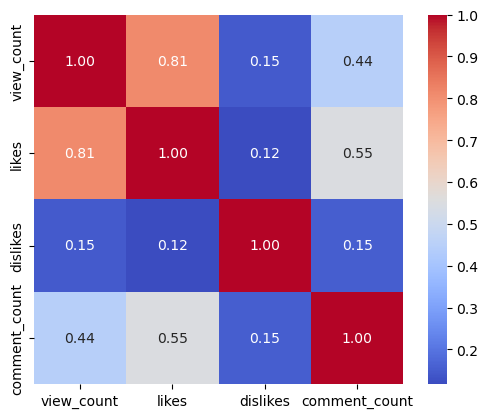

In [31]:
# Correlation heatmap
sns.heatmap(correlation,
            cmap='coolwarm',
            cbar=True, annot=True, 
            square=True, fmt='.2f', 
            annot_kws={'size':10})

In [32]:
# top 5 most liked videos
top_5_liked_videos=data.nlargest(5, 'likes')[["title","likes","dislikes"]]
top_5_liked_videos

,title,likes,dislikes
5821,BTS (방탄소년단) 'Butter' Official MV,16464253,181350
31099,BTS (방탄소년단) 'Dynamite' Official MV,16254784,770144
385,BLACKPINK - ‘Pink Venom’ M/V,12993894,0
3789,BTS (방탄소년단) 'Permission to Dance' Official MV,12767906,136328
16010,LISA - 'LALISA' M/V,12177724,151884


In [33]:
# top 5 most disliked videos
top_5_disliked_videos=data.nlargest(5, 'dislikes')[["title","likes","dislikes"]]
top_5_disliked_videos

,title,likes,dislikes
40557,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,680408,12341474
115572,Khaali Peeli | Teaser | Ishaan | Ananya Panday...,148209,1733752
141470,Prime Minister Narendra Modi's Mann Ki Baat wi...,438127,1229004
42576,Chocolate - Tony Kakkar ft. Riyaz Aly & Avneet...,1190462,1152531
115916,"Beyonse Sharma Jayegi - Khaali Peeli | Ishaan,...",114008,1098465


In [34]:
# top 5 most viewed videos
data.nlargest(5, 'view_count')[["title","view_count","likes","dislikes"]]

,title,view_count,likes,dislikes
5821,BTS (방탄소년단) 'Butter' Official MV,296314174,16464253,181350
385,BLACKPINK - ‘Pink Venom’ M/V,277791741,12993894,0
31099,BTS (방탄소년단) 'Dynamite' Official MV,262319276,16254784,770144
12,Turn into orbeez - Tutorial #Shorts,206202284,6840430,240769
40500,Filhaal2 Mohabbat | Akshay Kumar Ft Nupur Sano...,202091414,3997842,122432


Text(0.5, 1.0, 'Regression plot for views and likes')

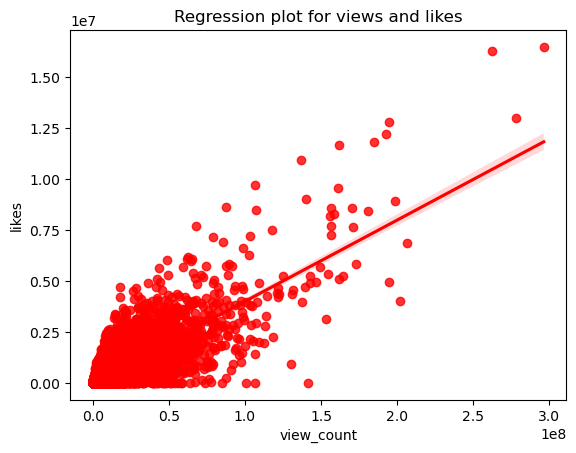

In [35]:
# regplot for likes
sns.regplot(data=data, x='view_count', y='likes', color='Red')
plt.title('Regression plot for views and likes')

Text(0.5, 1.0, 'Regression plot for views and dislikes')

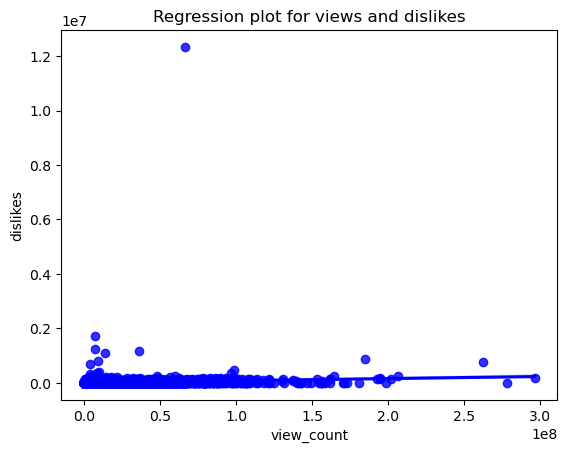

In [36]:
# regplot for dislikes
sns.regplot(data=data, x='view_count', y='dislikes', color= 'blue')
plt.title('Regression plot for views and dislikes')

# One instance is more deviating to the reg line

In [37]:
data["publish_date"].dt.year.value_counts()  # videos published in particular year

2021    147927
2022    137239
2023    102002
2020     62121
Name: publish_date, dtype: int64

In [39]:
#data["publish_date"].dt.month.value_counts()

In [40]:
#data["publish_date"].dt.day.value_counts()

Read .json files

In [41]:
# .json files have information about video categories
videos_categories = pd.read_json('archive/US_category_id.json')
categories = {int(category['id']): category['snippet']['title'] for category in videos_categories['items']}

In [42]:
categories

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [43]:
published_month=data["publish_date"].dt.month.value_counts().sort_index()  # month wise published videos
published_month

1     36537
2     33486
3     35767
4     33769
5     32551
6     33272
7     33477
8     44281
9     47356
10    46669
11    36702
12    35422
Name: publish_date, dtype: int64

In [44]:
trending_month=data["trending_date"].dt.month.value_counts().sort_index()  # Number of videos trending month-wise
trending_month

1     36809
2     33425
3     35755
4     33818
5     32285
6     34036
7     32987
8     42529
9     47086
10    48616
11    36712
12    35231
Name: trending_date, dtype: int64

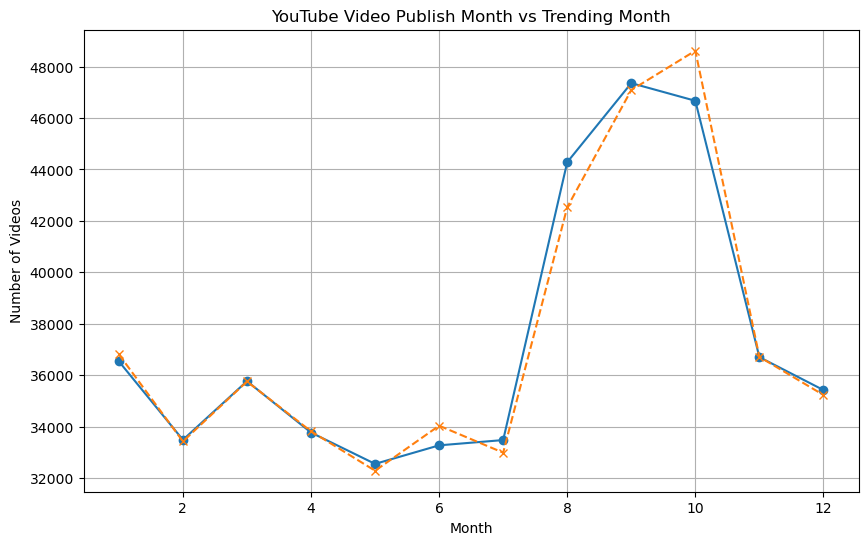

In [45]:
# YouTube Video Publish Month vs Trending Month chart
plt.figure(figsize=(10, 6))
plt.plot(published_month.index, published_month, marker='o', linestyle='-')
plt.plot(trending_month.index, trending_month, marker='x', linestyle='--')
plt.title('YouTube Video Publish Month vs Trending Month')
plt.xlabel('Month')
plt.ylabel('Number of Videos')
plt.grid(True)
plt.show()

# More videos are trending than published in June and October

In [48]:
# Print thumbnails from YouTube thumbnail link 
most_trending_thumb = data['thumbnail_link'].head(100).reset_index()['thumbnail_link']

ROW = 10
COLUMN = 10
tempHTML = ''
innerHTML = '<div style="block">'
    
for r in range(ROW):
    rowHTML = ''
    for c in range(COLUMN):
        tempHTML = '<img src="' + most_trending_thumb[c*10+r] + '"style="float:left;width:80px;height:80px;margin:0">'
        rowHTML += tempHTML
    innerHTML += rowHTML #'<div>' +rowHTML + '</div>'
innerHTML += '</div>'
display(HTML(innerHTML))

In [49]:
#Feature Engineering- Map categories to categoryId
data["categoryId"]=data["categoryId"].map(categories)

In [50]:
data = data.rename(columns={'categoryId': 'category'})  # Rename categoryId column

In [51]:
data["category"].value_counts()  # Count each category values counts

Entertainment            115373
People & Blogs            59991
Gaming                    56443
Sports                    47340
Music                     47259
News & Politics           29165
Comedy                    24781
Film & Animation          15352
Howto & Style             13362
Autos & Vehicles          13273
Science & Technology      10440
Education                  8243
Travel & Events            3614
Pets & Animals             2569
Nonprofits & Activism      2084
Name: category, dtype: int64

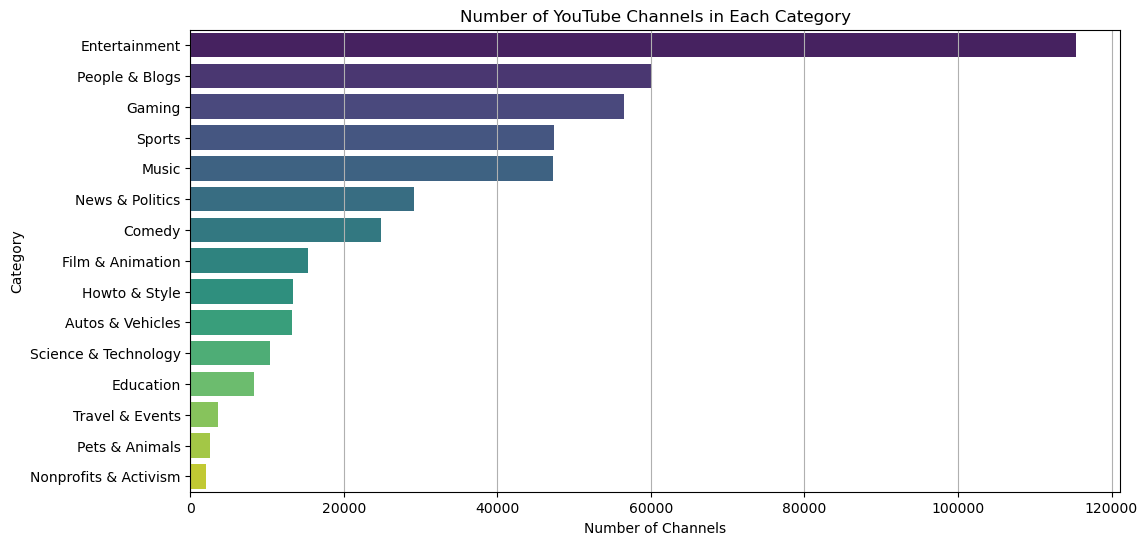

In [52]:
# Visualize the number of channels in each category using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(y=data["category"].value_counts().index, x=data["category"].value_counts(), palette="viridis")
plt.title('Number of YouTube Channels in Each Category')
plt.xlabel('Number of Channels')
plt.ylabel('Category')
plt.grid(axis='x')
plt.show()

In [53]:
# category_wise_analysis
category_wise_analysis=data.groupby("category").sum()
category_wise_analysis


C:\Users\ankit\AppData\Local\Temp\ipykernel_38688\1496719405.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  category_wise_analysis=data.groupby("category").sum()


,view_count,likes,dislikes,comment_count,days_of_trending
category,,,,,
Autos & Vehicles,6602913004,329538585,4694921,22149305,51833
Comedy,33831861325,2025137144,25284370,73224843,123429
Education,7086911750,378719325,4063669,18555701,40529
Entertainment,165512723302,7366252494,108341560,345343639,606971
Film & Animation,17464256545,592612889,7843315,33289320,64675
Gaming,47653859048,2862987419,22999663,146822022,272484
Howto & Style,10816122852,477882473,7505027,18831231,70025
Music,109777595276,4830094013,71003224,399268099,301846
News & Politics,18646405265,481860865,14719861,62238453,93631


In [54]:
# channelTitle_wise_analysis
channelTitle_wise_analysis=data.groupby("channelTitle").agg("sum").sort_values(by='view_count', ascending=False)
channelTitle_wise_analysis

C:\Users\ankit\AppData\Local\Temp\ipykernel_38688\496054246.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  channelTitle_wise_analysis=data.groupby("channelTitle").agg("sum").sort_values(by='view_count', ascending=False)


,view_count,likes,dislikes,comment_count,days_of_trending
channelTitle,,,,,
T-Series,5163170506,129533628,3920438,8538586,934
MrBeast,4897219387,271529935,997627,10687697,967
A4,4829582373,344455968,5245824,31568509,1504
Sourav Joshi Vlogs,4090891062,375757522,1038072,14767786,1666
HAR PAL GEO,3963101444,64906903,475810,2074063,1409
...,...,...,...,...,...
PUBG Brasil,10389,577,6,1,3
PA Sports Twitch Highlights,7841,603,4,56,3
YouTube France,0,0,0,190,22


In [55]:
#Most number of times channel is on trending (Top 25 channels)

most_frequently_trending_chanel=data.groupby(["channelTitle","category"])[["video_id"]].count().sort_values(by="video_id",ascending=False).reset_index().head(25)
most_frequently_trending_chanel = most_frequently_trending_chanel.rename(columns={'video_id': 'no of time channel was trending'})
most_frequently_trending_chanel


,channelTitle,category,no of time channel was trending
0,Vijay Television,Entertainment,1725
1,Телеканал Дождь,News & Politics,1163
2,Colors TV,Entertainment,1050
3,Матч ТВ,Sports,999
4,Sony SAB,Entertainment,918
5,ge,Sports,873
6,Sourav Joshi Vlogs,People & Blogs,854
7,Анатолий Шарий,Comedy,806
8,Sun TV,Entertainment,797
9,Sky Sports Football,Sports,774


C:\Users\ankit\AppData\Local\Temp\ipykernel_38688\3020963510.py:9: UserWarning: Glyph 26481 (\N{CJK UNIFIED IDEOGRAPH-6771}) missing from current font.
  plt.tight_layout()
C:\Users\ankit\AppData\Local\Temp\ipykernel_38688\3020963510.py:9: UserWarning: Glyph 28023 (\N{CJK UNIFIED IDEOGRAPH-6D77}) missing from current font.
  plt.tight_layout()
C:\Users\ankit\AppData\Local\Temp\ipykernel_38688\3020963510.py:9: UserWarning: Glyph 12458 (\N{KATAKANA LETTER O}) missing from current font.
  plt.tight_layout()
C:\Users\ankit\AppData\Local\Temp\ipykernel_38688\3020963510.py:9: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  plt.tight_layout()
C:\Users\ankit\AppData\Local\Temp\ipykernel_38688\3020963510.py:9: UserWarning: Glyph 12456 (\N{KATAKANA LETTER E}) missing from current font.
  plt.tight_layout()
C:\Users\ankit\AppData\Local\Temp\ipykernel_38688\3020963510.py:9: UserWarning: Glyph 12450 (\N{KATAKANA LETTER A}) missing from current font.
  plt.tight_layout(

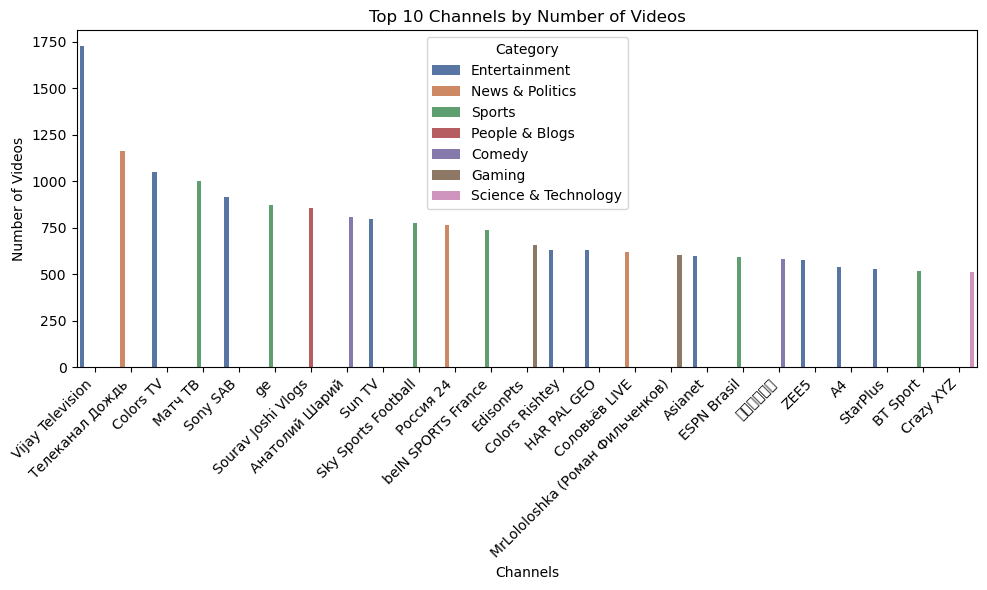

In [56]:
# Bar plot of most number of times channel is on trending (Top 10 channels) with category
plt.figure(figsize=(10, 6))
sns.barplot(x='channelTitle', y='no of time channel was trending', hue='category', data=most_frequently_trending_chanel, palette="deep")
plt.xlabel('Channels')
plt.ylabel('Number of Videos')
plt.title('Top 10 Channels by Number of Videos')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category')

plt.tight_layout()


<Axes: xlabel='no of time channel was trending', ylabel='channelTitle'>

c:\Users\ankit\miniconda3\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 26481 (\N{CJK UNIFIED IDEOGRAPH-6771}) missing from current font.
  func(*args, **kwargs)
c:\Users\ankit\miniconda3\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 28023 (\N{CJK UNIFIED IDEOGRAPH-6D77}) missing from current font.
  func(*args, **kwargs)
c:\Users\ankit\miniconda3\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12458 (\N{KATAKANA LETTER O}) missing from current font.
  func(*args, **kwargs)
c:\Users\ankit\miniconda3\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  func(*args, **kwargs)
c:\Users\ankit\miniconda3\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12456 (\N{KATAKANA LETTER E}) missing from current font.
  func(*args, **kwargs)
c:\Users\ankit\miniconda3\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12450 (\N{KATAKANA LETTER A}) missing

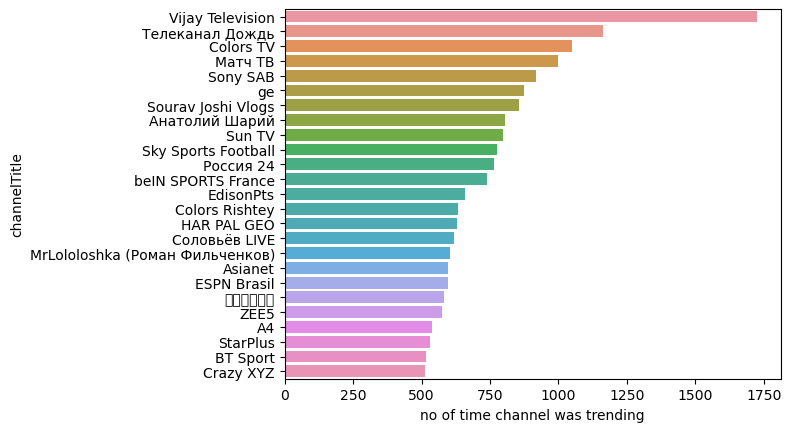

In [76]:
# Bar plot of most number of times channel is on trending (Top 10 channels)
sns.barplot(y=most_frequently_trending_chanel["channelTitle"], x=most_frequently_trending_chanel["no of time channel was trending"])

<Axes: title={'center': 'Average no.of days took to be in trending'}, xlabel='category', ylabel='days_of_trending'>

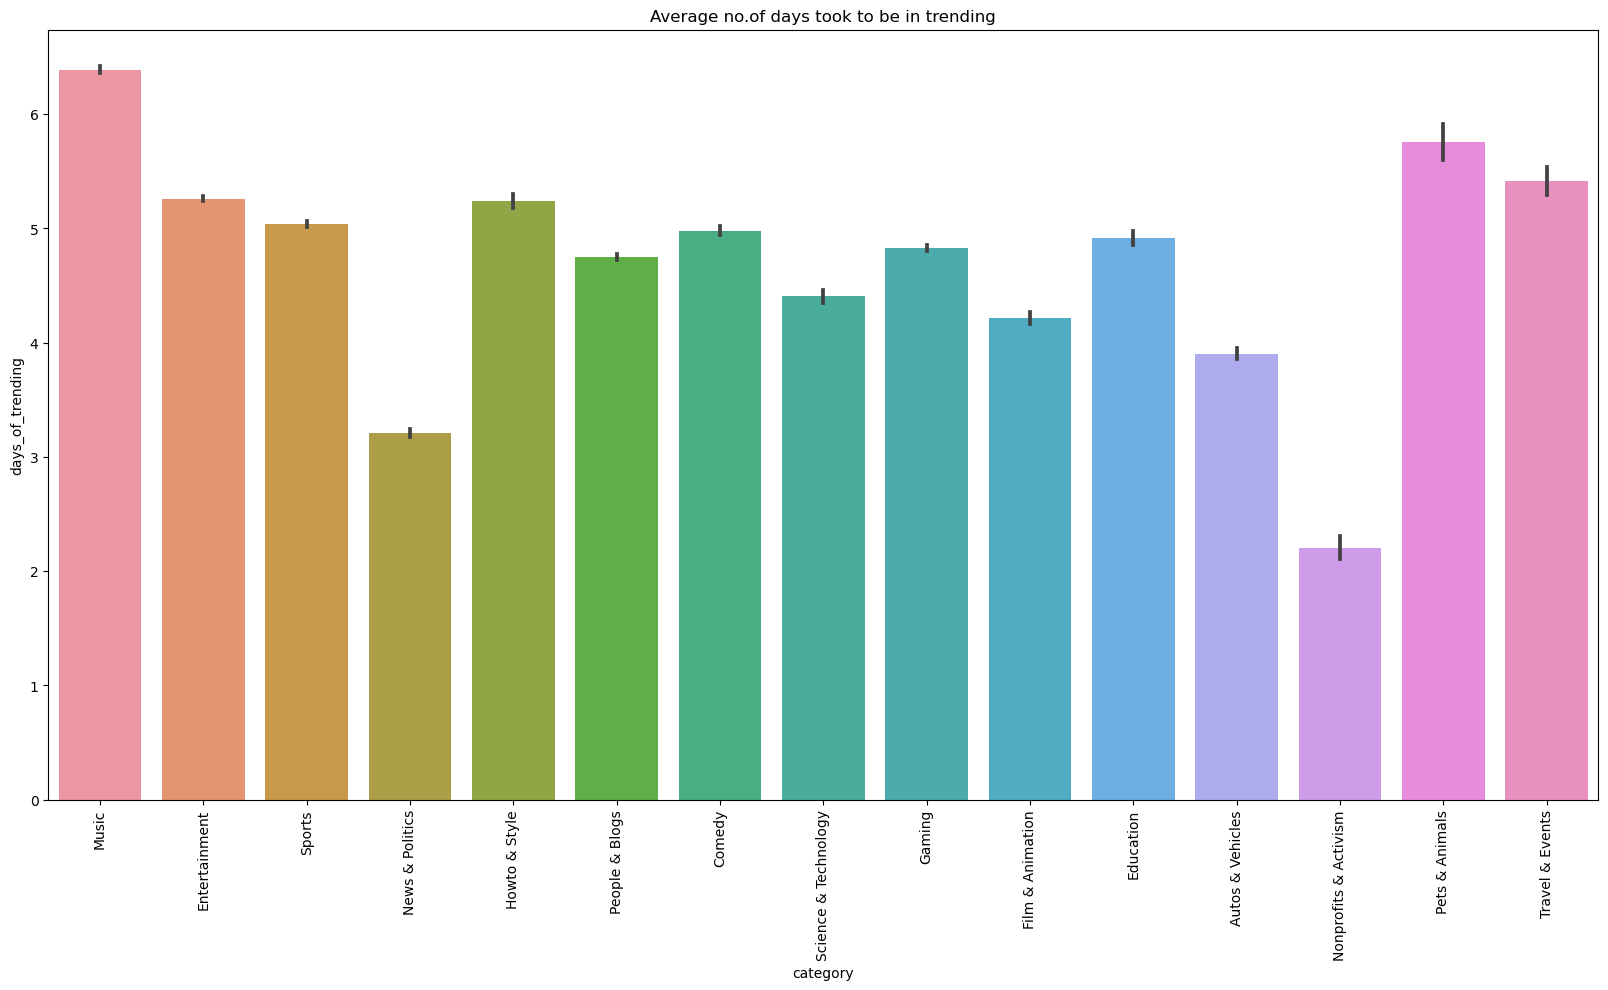

In [57]:
#avg no of days it took in trending
plt.figure(figsize=(20,10))

# Add title
plt.title("Average no.of days took to be in trending")
plt.xlabel
plt.xticks(rotation=90)
sns.barplot(x=data["category"], y=data["days_of_trending"])

In [58]:
# Average trending days category wise
data.groupby("category")["days_of_trending"].mean("days_of_trending")

category
Autos & Vehicles         3.905146
Comedy                   4.980792
Education                4.916778
Entertainment            5.260945
Film & Animation         4.212806
Gaming                   4.827596
Howto & Style            5.240608
Music                    6.387059
News & Politics          3.210389
Nonprofits & Activism    2.203935
People & Blogs           4.748179
Pets & Animals           5.752822
Science & Technology     4.405364
Sports                   5.040093
Travel & Events          5.417543
Name: days_of_trending, dtype: float64

In [59]:
cleaned_data2=data.copy()  # Copy data
data.to_csv("data_use.csv", index=False)

In [60]:
data=data[["title","channelTitle","category","tags","description","country"]]
data_for_sentiment_analysis=data.copy()
data


,title,channelTitle,category,tags,description,country
0,Lewis Capaldi - Wish You The Best (Official Vi...,LewisCapaldiVEVO,Music,BBDTBHS|Before You Go|Broken By Desire To Be H...,Listen to my new album ‘Broken By Desire To Be...,US
1,"Every Country On Earth Fights For $250,000!",MrBeast,Entertainment,[None],Get my FREE gold skin for a limited time by pl...,US
2,Highlights: Manchester United 0-5 Liverpool | ...,Liverpool FC,Sports,Liverpool FC|LFC|Liverpool|Anfield|Melwood|Liv...,Watch highlights of Liverpool's sensational 5-...,US
3,7 Days Stranded At Sea,MrBeast,Entertainment,[None],🚀 Launch a store on Shopify right now 👉 https:...,US
4,Watch the uncensored moment Will Smith smacks ...,Guardian News,News & Politics,Jada Pinkett Smith|Jada Pinkett Smith chris ro...,Best actor nominee Will Smith appeared to slap...,US
...,...,...,...,...,...,...
449284,САУЛЬ КАНЕЛО АЛЬВАРЕС vs. КАЛЕБ ПЛАНТ,KrassboX,Sports,бокс|новости бокса|ufc|крассбокс|krassbox|бои|...,►ЛУЧШИЕ В СВОЕМ ДЕЛЕ - KRASSBOXТЕЛЕГРАМ - http...,RU
449285,"NHL Highlights | Wild vs. Penguins - Nov. 6, 2021",SPORTSNET,Sports,Minnesota Wild|Minnesota Wild at Pittsburgh Pe...,The Minnesota Wild defeated the Pittsburgh Pen...,RU
449286,БОЙ: Джастин Гейджи - Майкл Чендлер | UFC 268,Дикий бой,Sports,UFC|UFC 268|ЮФС|ЮФС 268|UFC бои|Джастин Гейджи...,Ссылка на BetBoom в первом закрепленном коммен...,RU
449287,Лучшие моменты турнира UFC 268: Усман vs Ковин...,UFC Russia,Sports,ufc|ufc 268|усман|ковингтон|намаюнас|гейджи|че...,Подборка лучших моментов турнира UFC 268: Усма...,RU


In [61]:
# Check how many videos are capitalized
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


capitalized_word=data["title"].apply(contains_capitalized_word).value_counts()
capitalized_word



True     254425
False    194864
Name: title, dtype: int64

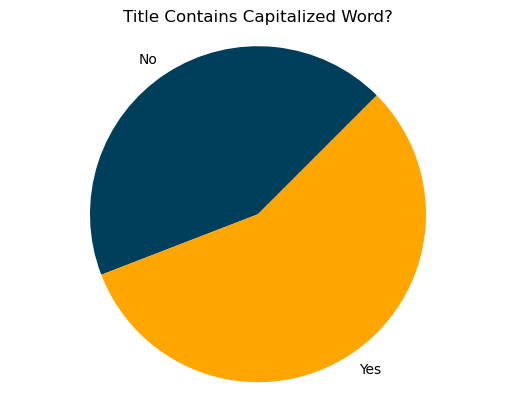

In [62]:
# Plot graph
fig, ax = plt.subplots()
_ = ax.pie([capitalized_word[False], capitalized_word[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')


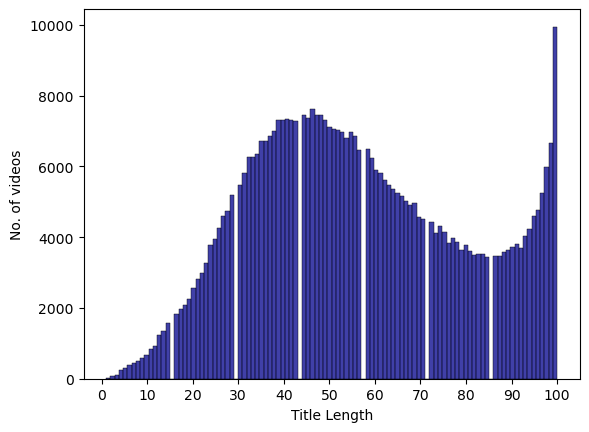

In [63]:
# Histogram of title_character_length
title_character_length = data["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.histplot(title_character_length,kde=False, 
                 color="DarkBlue",  ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

# All videos have less than 100 characters

# NLTK

In [64]:
import nltk

# Display the list of languages
languages_with_stopwords = nltk.corpus.stopwords.fileids()
print(languages_with_stopwords)

['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


### Stopwords are available in the above languages.  This data has video titles in Portugese, German, English, Hinglish, French, Russian, and Spanish; so stop_words of all these languages are used.

In [65]:
# stop_words
stop_words_portuguese = set(stopwords.words('portuguese'))
stop_words_german = set(stopwords.words('german'))
stop_words_english = set(stopwords.words('english'))
stop_words_hinglish = set(stopwords.words('hinglish'))
stop_words_french = set(stopwords.words('french'))
stop_words_russian = set(stopwords.words('russian'))
stop_words_spanish = set(stopwords.words('spanish'))

stop_words= stop_words_portuguese | stop_words_german | stop_words_english | stop_words_hinglish | stop_words_french | stop_words_russian | stop_words_spanish
stop_words

{'были',
 'serious',
 'ton',
 'dessen',
 'houverem',
 'estás',
 'should',
 'allow',
 'quem',
 'nuestro',
 'iss',
 'mjhe',
 'dude',
 'solcher',
 'ie',
 'thus',
 'bolte',
 'quien',
 'are',
 'kann',
 'arent',
 'eines',
 'manche',
 'ont',
 'yours',
 'suya',
 'whom',
 'les',
 'anything',
 'num',
 'maane',
 'suyos',
 'estén',
 'eine',
 'ihren',
 'хоть',
 'well',
 'habremos',
 'some',
 'никогда',
 'nuestras',
 'suyas',
 'wasnt',
 'estada',
 'tuviesen',
 "hasn't",
 'eussions',
 'à',
 'tenía',
 'вот',
 'чтоб',
 'eurem',
 'están',
 'keine',
 'waise',
 'teesra',
 'kahte',
 'they',
 'estive',
 'why',
 'unseren',
 'honaa',
 'dieser',
 'gets',
 'elsewhere',
 'während',
 'karenge',
 'себе',
 'bolta',
 'waisa',
 'moi',
 'можно',
 'krne',
 'la',
 'lagta',
 'neeche',
 'bande',
 'tenido',
 'become',
 'liked',
 'serías',
 'aaya',
 'seront',
 'же',
 'hinter',
 'hereby',
 'avait',
 'una',
 'habría',
 'einer',
 'vous',
 'another',
 'estaremos',
 'ao',
 'isme',
 'tendrás',
 'lagte',
 'chaiye',
 'whereby',
 'а

In [67]:
# 25 Most common words in title
title_words = list(data["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('|', 184555),
 ('-', 105072),
 ('de', 19522),
 ('в', 17926),
 ('&', 17498),
 ('/', 15437),
 ('и', 13795),
 ('The', 13244),
 ('!', 12801),
 ('2', 12313),
 ('in', 11748),
 ('A', 11445),
 ('В', 11004),
 ('DE', 10997),
 ('#shorts', 10849),
 ('на', 10690),
 ('a', 10637),
 ('I', 10582),
 ('||', 10562),
 ('1', 8975),
 ('the', 8958),
 ('vs', 8814),
 ('2021', 8732),
 ('2022', 8140),
 ('to', 8084)]

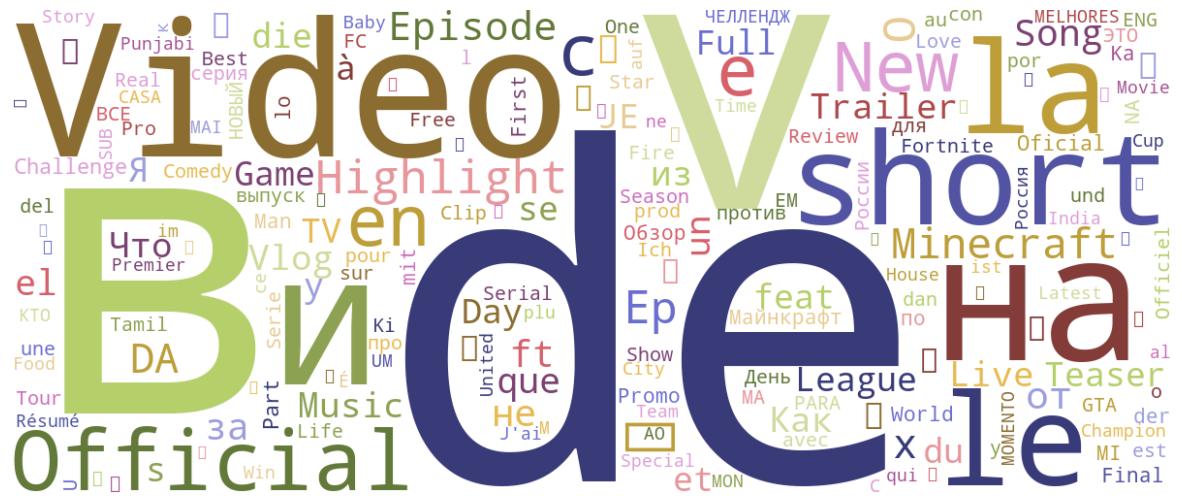

In [68]:
# Wordcloud of 25 most common words
wc = WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

In [69]:
data

,title,channelTitle,category,tags,description,country
0,Lewis Capaldi - Wish You The Best (Official Vi...,LewisCapaldiVEVO,Music,BBDTBHS|Before You Go|Broken By Desire To Be H...,Listen to my new album ‘Broken By Desire To Be...,US
1,"Every Country On Earth Fights For $250,000!",MrBeast,Entertainment,[None],Get my FREE gold skin for a limited time by pl...,US
2,Highlights: Manchester United 0-5 Liverpool | ...,Liverpool FC,Sports,Liverpool FC|LFC|Liverpool|Anfield|Melwood|Liv...,Watch highlights of Liverpool's sensational 5-...,US
3,7 Days Stranded At Sea,MrBeast,Entertainment,[None],🚀 Launch a store on Shopify right now 👉 https:...,US
4,Watch the uncensored moment Will Smith smacks ...,Guardian News,News & Politics,Jada Pinkett Smith|Jada Pinkett Smith chris ro...,Best actor nominee Will Smith appeared to slap...,US
...,...,...,...,...,...,...
449284,САУЛЬ КАНЕЛО АЛЬВАРЕС vs. КАЛЕБ ПЛАНТ,KrassboX,Sports,бокс|новости бокса|ufc|крассбокс|krassbox|бои|...,►ЛУЧШИЕ В СВОЕМ ДЕЛЕ - KRASSBOXТЕЛЕГРАМ - http...,RU
449285,"NHL Highlights | Wild vs. Penguins - Nov. 6, 2021",SPORTSNET,Sports,Minnesota Wild|Minnesota Wild at Pittsburgh Pe...,The Minnesota Wild defeated the Pittsburgh Pen...,RU
449286,БОЙ: Джастин Гейджи - Майкл Чендлер | UFC 268,Дикий бой,Sports,UFC|UFC 268|ЮФС|ЮФС 268|UFC бои|Джастин Гейджи...,Ссылка на BetBoom в первом закрепленном коммен...,RU
449287,Лучшие моменты турнира UFC 268: Усман vs Ковин...,UFC Russia,Sports,ufc|ufc 268|усман|ковингтон|намаюнас|гейджи|че...,Подборка лучших моментов турнира UFC 268: Усма...,RU


In [70]:
data.to_csv("clean_data.csv")  # Save data

In [71]:
data=data[["title","country"]]

### The BERT model(nlptown/bert-base-multilingual-uncased-sentiment) I will be using supports sentiment analysis in English, Spanish, German, and French. So, I am keeping the data which is trending in US, FR, MX, and DE.

In [72]:
data = data[data['country'].isin(['US',"FR","MX","DE"])]

In [73]:
data

,title,country
0,Lewis Capaldi - Wish You The Best (Official Vi...,US
1,"Every Country On Earth Fights For $250,000!",US
2,Highlights: Manchester United 0-5 Liverpool | ...,US
3,7 Days Stranded At Sea,US
4,Watch the uncensored moment Will Smith smacks ...,US
...,...,...
449063,Le Coroner autopsie Léonidas (300),FR
449120,Résumé : Messi sauve (encore) l'Argentine,FR
449154,Leipzig – Atlético : La performance XXL d’Upam...,FR
449161,"🚨 JOUR HISTORIQUE POUR LE PSG, FAUX PAS INTERD...",FR


### There can be a case when the video of one country is in trending in another country. So, I am using langid library to detect the language of video title, and will keep only those data where the video title's detected language is English, French, German, and Spanish.

In [75]:
# Detect languages with title
import langid
def detect_language(text):
    try:
        return langid.classify(text)[0]
    except:
        return None

# Add a new column with detected languages
data['detected_language'] = data['title'].apply(detect_language)

data

,title,country,detected_language
0,Lewis Capaldi - Wish You The Best (Official Vi...,US,en
1,"Every Country On Earth Fights For $250,000!",US,en
2,Highlights: Manchester United 0-5 Liverpool | ...,US,en
3,7 Days Stranded At Sea,US,en
4,Watch the uncensored moment Will Smith smacks ...,US,en
...,...,...,...
449063,Le Coroner autopsie Léonidas (300),FR,es
449120,Résumé : Messi sauve (encore) l'Argentine,FR,fr
449154,Leipzig – Atlético : La performance XXL d’Upam...,FR,fr
449161,"🚨 JOUR HISTORIQUE POUR LE PSG, FAUX PAS INTERD...",FR,pa


In [76]:
data["detected_language"].value_counts()

en    36896
fr    28323
de    25167
es    18511
it     1717
      ...  
uk        3
dz        3
mn        3
be        1
kk        1
Name: detected_language, Length: 97, dtype: int64

In [77]:
data["detected_language"].unique()  # Unique languages detected

array(['en', 'es', 'pl', 'fr', 'de', 'mt', 'ro', 'mg', 'no', 'ko', 'br',
       'ca', 'pt', 'fi', 'nl', 'sk', 'et', 'la', 'lb', 'zh', 'el', 'lt',
       'ug', 'eo', 'ga', 'it', 'vi', 'hu', 'cs', 'cy', 'ja', 'an', 'qu',
       'gl', 'da', 'tr', 'sl', 'oc', 'lv', 'bs', 'id', 'tl', 'am', 'kn',
       'sv', 'se', 'bn', 'hy', 'ka', 'he', 'mr', 'ur', 'rw', 'vo', 'ne',
       'lo', 'is', 'ht', 'af', 'km', 'sq', 'hi', 'jv', 'ar', 'ms', 'th',
       'pa', 'eu', 'fo', 'fa', 'nn', 'te', 'az', 'dz', 'sw', 'bg', 'ta',
       'ru', 'wa', 'xh', 'hr', 'ps', 'si', 'or', 'nb', 'uk', 'zu', 'ml',
       'as', 'ky', 'ku', 'mk', 'gu', 'sr', 'be', 'mn', 'kk'], dtype=object)

### There are so many languages detected in video titles. As BERT model only supports few languages, I am only including data which has "english, french, german, and spanish" as detected language

In [78]:
selected_countries=data[data["detected_language"].isin(["en","fr","de","es"])]
selected_countries.reset_index(drop=True)

,title,country,detected_language
0,Lewis Capaldi - Wish You The Best (Official Vi...,US,en
1,"Every Country On Earth Fights For $250,000!",US,en
2,Highlights: Manchester United 0-5 Liverpool | ...,US,en
3,7 Days Stranded At Sea,US,en
4,Watch the uncensored moment Will Smith smacks ...,US,en
...,...,...,...
108892,"OFF (feat. Mcfly et Carlito, Le Monde à L'Enve...",FR,fr
108893,Le Coroner autopsie Léonidas (300),FR,es
108894,Résumé : Messi sauve (encore) l'Argentine,FR,fr
108895,Leipzig – Atlético : La performance XXL d’Upam...,FR,fr


### To reduce the data and make data more robust, I am applying a condition that matches detected language and country column. 

### For example, if detected language is French, then country must be France. 

In [80]:
condition = ((data['detected_language'] == 'en')& (data['country'] == 'US')) | ((data['detected_language'] == 'de') & (data['country'] == 'DE')) | ((data['detected_language'] == 'fr') & (data['country'] == 'FR'))| ((data['detected_language'] == 'es') & (data['country'] == 'MX'))

# Filter the DataFrame based on the condition
selected_countries_and_language = data[condition]
selected_countries_and_language.reset_index(drop=True)

,title,country,detected_language
0,Lewis Capaldi - Wish You The Best (Official Vi...,US,en
1,"Every Country On Earth Fights For $250,000!",US,en
2,Highlights: Manchester United 0-5 Liverpool | ...,US,en
3,7 Days Stranded At Sea,US,en
4,Watch the uncensored moment Will Smith smacks ...,US,en
...,...,...,...
87423,SKAM FRANCE EP.4 S7 : Mardi 10h15 - Test pater...,FR,fr
87424,Mein iPhone 15 & 15 Pro Ersteindruck!,DE,de
87425,"OFF (feat. Mcfly et Carlito, Le Monde à L'Enve...",FR,fr
87426,Résumé : Messi sauve (encore) l'Argentine,FR,fr


In [91]:
selected_countries_and_language.to_csv("cleaner_data.csv",index=False) # Save data in .csv

In [92]:
from tqdm import tqdm  # tqdm helps to see the progress
tqdm.pandas()

In [93]:
data=selected_countries_and_language.drop(columns=["country","detected_language"]).reset_index(drop=True)
data

,title
0,Lewis Capaldi - Wish You The Best (Official Vi...
1,"Every Country On Earth Fights For $250,000!"
2,Highlights: Manchester United 0-5 Liverpool | ...
3,7 Days Stranded At Sea
4,Watch the uncensored moment Will Smith smacks ...
...,...
87423,SKAM FRANCE EP.4 S7 : Mardi 10h15 - Test pater...
87424,Mein iPhone 15 & 15 Pro Ersteindruck!
87425,"OFF (feat. Mcfly et Carlito, Le Monde à L'Enve..."
87426,Résumé : Messi sauve (encore) l'Argentine


# Sentiment Analysis

In [86]:
from transformers import pipeline   #pipeline helps to call pre-trained model with respect to BERT, distilBERT, GPT2 etc.
from transformers import BertTokenizer, TFBertModel

classifier=pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

In [87]:
# Function to classify sentiment for a given text
def classify_sentiment(text):
    result = classifier(text)
    return result[0]['label'], result[0]['score']

In [94]:
# Classify sentiment, give it a label and score 
data[['title_label', 'title_score']] = data['title'].progress_apply(classify_sentiment).apply(pd.Series)
data

100%|██████████| 87428/87428 [1:32:50<00:00, 15.70it/s]


,title,title_label,title_score
0,Lewis Capaldi - Wish You The Best (Official Vi...,5 stars,0.372535
1,"Every Country On Earth Fights For $250,000!",5 stars,0.773097
2,Highlights: Manchester United 0-5 Liverpool | ...,4 stars,0.257221
3,7 Days Stranded At Sea,1 star,0.799313
4,Watch the uncensored moment Will Smith smacks ...,5 stars,0.334277
...,...,...,...
87423,SKAM FRANCE EP.4 S7 : Mardi 10h15 - Test pater...,1 star,0.248293
87424,Mein iPhone 15 & 15 Pro Ersteindruck!,5 stars,0.723054
87425,"OFF (feat. Mcfly et Carlito, Le Monde à L'Enve...",3 stars,0.233756
87426,Résumé : Messi sauve (encore) l'Argentine,5 stars,0.299490


In [146]:
#data=pd.read_csv("sentiment.csv") # Save data in .csv file
#data

In [114]:
data[data["title_score"]>0.50]  # 28,000+ videos have more than 50% title score

,title,title_label,title_score
1,"Every Country On Earth Fights For $250,000!",5 stars,0.773097
3,7 Days Stranded At Sea,1 star,0.799313
5,Golden Buzzer: 9-Year-Old Victory Brinker Make...,5 stars,0.768653
6,"India claim stunning series win, end Australia...",5 stars,0.616361
8,Golden Buzzer: Putri Ariani receives the GOLDE...,5 stars,0.550737
...,...,...,...
87413,Di Maria mit dem goldenen Treffer! Messi krönt...,5 stars,0.876417
87415,King Von - How It Go (Audio),5 stars,0.516441
87420,Porto - OM : Enlevez toutes les cordes... La d...,1 star,0.698735
87424,Mein iPhone 15 & 15 Pro Ersteindruck!,5 stars,0.723054


In [115]:
data["title_label"].value_counts()  # Value count of title_label

5 stars    46741
1 star     22756
4 stars    10488
3 stars     5768
2 stars     1675
Name: title_label, dtype: int64

In [116]:
data=data.drop(columns=["title_score"], axis=1)
data

,title,title_label
0,Lewis Capaldi - Wish You The Best (Official Vi...,5 stars
1,"Every Country On Earth Fights For $250,000!",5 stars
2,Highlights: Manchester United 0-5 Liverpool | ...,4 stars
3,7 Days Stranded At Sea,1 star
4,Watch the uncensored moment Will Smith smacks ...,5 stars
...,...,...
87423,SKAM FRANCE EP.4 S7 : Mardi 10h15 - Test pater...,1 star
87424,Mein iPhone 15 & 15 Pro Ersteindruck!,5 stars
87425,"OFF (feat. Mcfly et Carlito, Le Monde à L'Enve...",3 stars
87426,Résumé : Messi sauve (encore) l'Argentine,5 stars


We will consider the above data as original data. I will divide this data into training and testing and later, perform the model training and sentiment analysis.

In [117]:
data.to_csv("sentiment.csv",index=False)  # Save data in .csv file

# Data Preprocessing

In [118]:
# Convert title_label into sentiment and have values in positive, negative, and neutral
data['sentiment'] = data['title_label'].map({"1 star": 'negative', "2 stars": 'negative', "3 stars": 'neutral', "4 stars": 'positive', "5 stars": 'positive'})
data=data.drop(columns=["title_label"], axis=1)
data

,title,sentiment
0,Lewis Capaldi - Wish You The Best (Official Vi...,positive
1,"Every Country On Earth Fights For $250,000!",positive
2,Highlights: Manchester United 0-5 Liverpool | ...,positive
3,7 Days Stranded At Sea,negative
4,Watch the uncensored moment Will Smith smacks ...,positive
...,...,...
87423,SKAM FRANCE EP.4 S7 : Mardi 10h15 - Test pater...,negative
87424,Mein iPhone 15 & 15 Pro Ersteindruck!,positive
87425,"OFF (feat. Mcfly et Carlito, Le Monde à L'Enve...",neutral
87426,Résumé : Messi sauve (encore) l'Argentine,positive


Remove punctuation, stopwords, and converting words to lowercase is applied to the datasets. This ensures that the text data is cleaned and pre-processed consistently.

In [121]:
def clean_titles(title):
    tokens = title.split()
    cleaned = []

    for token in tokens:
        if token.startswith('$') or token.isnumeric() or not token.isalnum() or token in stop_words:  # Remove money amount, non-alphanumeric tokens, or stopwords
            continue
        else:
            cleaned.append(token)
    return ' '.join(cleaned)

# Remove punctuation
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data["title"]=data["title"].apply(lambda x:x.lower())  # Lower the title
data['title'] = data['title'].apply(punctuation_removal)
data['title'] = data['title'].apply(clean_titles)

data

,title,sentiment
0,lewis capaldi wish official video,positive
1,country earth fights,positive
2,highlights manchester united liverpool salah h...,positive
3,days stranded,negative
4,watch uncensored moment smith smacks chris roc...,positive
...,...,...
87423,skam france ep4 s7 mardi 10h15 test paternité,negative
87424,iphone pro ersteindruck,positive
87425,feat mcfly carlito monde lenvers paul mirabel,neutral
87426,résumé messi sauve encore largentine,positive


# Input data preparation

Building the vocabulary involves creating a mapping between words and integer indices. This mapping is based on the entire dataset to ensure that the vocabulary covers all unique words in your data.

Padding sequences to a fixed length is also applied to entire dataset. This ensures that the input sequences have the same length, which is necessary for models like transformers.

I am taking the max word count in title, so that I can determine max_length for padding. If max_length is bigger, that it will take more memory space and take more time to train.

In [122]:
data['word_count'] = data['title'].apply(lambda x: len(x.split()))  # Print word count in title 
data

,title,sentiment,word_count
0,lewis capaldi wish official video,positive,5
1,country earth fights,positive,3
2,highlights manchester united liverpool salah h...,positive,8
3,days stranded,negative,2
4,watch uncensored moment smith smacks chris roc...,positive,11
...,...,...,...
87423,skam france ep4 s7 mardi 10h15 test paternité,negative,8
87424,iphone pro ersteindruck,positive,3
87425,feat mcfly carlito monde lenvers paul mirabel,neutral,7
87426,résumé messi sauve encore largentine,positive,5


In [123]:
data['word_count'].max()  # Max word_count

17

In [124]:
data=data.drop(columns=["word_count"],axis=1)
data

,title,sentiment
0,lewis capaldi wish official video,positive
1,country earth fights,positive
2,highlights manchester united liverpool salah h...,positive
3,days stranded,negative
4,watch uncensored moment smith smacks chris roc...,positive
...,...,...
87423,skam france ep4 s7 mardi 10h15 test paternité,negative
87424,iphone pro ersteindruck,positive
87425,feat mcfly carlito monde lenvers paul mirabel,neutral
87426,résumé messi sauve encore largentine,positive


In [125]:
a=data.copy()  # Copy data

In [126]:
train_data=data.iloc[:67000,:]  # Train data
test_data=data.iloc[67000:,:]  # Test data

In [150]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from transformers import TFBertModel
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import SGD

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [129]:
# Create a Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['title'])

# Convert text data to sequences
train_sequences = tokenizer.texts_to_sequences(train_data['title'])
test_sequences = tokenizer.texts_to_sequences(test_data['title'])

# Pad sequences to a fixed length
max_length = 20  
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post')  # padding will be inserted after the title
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post')


In [131]:
print("Word Index:")
print(tokenizer.word_index)

Word Index:
{'video': 1, 'official': 2, 'vs': 3, 'minecraft': 4, 'highlights': 5, 'ft': 6, 'oficial': 7, 'jai': 8, 'shorts': 9, 'x': 10, 'music': 11, 'clip': 12, 'trailer': 13, 'officiel': 14, 'résumé': 15, 'feat': 16, 'fortnite': 17, 'game': 18, 'fc': 19, 'league': 20, 'france': 21, 'resumen': 22, 'fait': 23, 'real': 24, 'cest': 25, 'monde': 26, 'méxico': 27, 'ça': 28, 'final': 29, 'live': 30, 'episode': 31, 'premier': 32, 'tout': 33, 'vlog': 34, 'challenge': 35, 'season': 36, 'mx': 37, 'dazn': 38, 'liga': 39, 'tour': 40, 'nba': 41, 'saison': 42, 'house': 43, 'tag': 44, 'comment': 45, 'pourquoi': 46, 'champions': 47, 'city': 48, 'sports': 49, 'psg': 50, 'vie': 51, 'life': 52, 'mal': 53, 'casa': 54, 'lil': 55, 'baby': 56, 'full': 57, 'folge': 58, 'bayern': 59, 'pro': 60, 'show': 61, 'madrid': 62, 'gta': 63, '24h': 64, 'part': 65, 'teste': 66, 'update': 67, 'wild': 68, 'mundo': 69, 'goles': 70, 'neue': 71, 'cette': 72, 'tiktok': 73, 'iphone': 74, 'nouvelle': 75, 'world': 76, 'day': 77, 

In [132]:
# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1

print("\nVocabulary Size:", vocab_size)


Vocabulary Size: 66112


In [133]:
print("\nTrain Sequences:")
print(train_sequences[0])


Train Sequences:
[10177, 21588, 1291, 2, 1]


In [134]:
print("\nTrained Padded Sequences:")
print(train_padded)



Trained Padded Sequences:
[[10177 21588  1291 ...     0     0     0]
 [ 1592  2391  5209 ...     0     0     0]
 [    5    92   118 ...     0     0     0]
 ...
 [ 1858 16285   367 ...     0     0     0]
 [  699   134 66109 ...     0     0     0]
 [  166  1036 66110 ...     0     0     0]]


# Transformer implementation

I am taking pre-trained BERT model. The layers of BERT models are frozen so that the weights parameter of BERT model can not be changed. I added 2 more layers on top of BERT layers. The first layer has 256 neurons and activation function is ReLU. It allows the model to learn complex hierarchical features from the representation obtained from the BERT model. Second layer has 3 neurons, and it uses softmax activation.having 3 neurons suggests that the model is designed to predict one of three sentiment classes (e.g., positive, neutral, negative).

In [135]:
# Load pre-trained BERT model
bert_model = TFBertModel.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

# Freeze BERT layers
for layer in bert_model.layers:
    layer.trainable = False

# Build the custom model
input_layer = Input(shape=(max_length,), dtype=tf.int32)
bert_output = bert_model(input_layer)[0]
cls_token = bert_output[:, 0, :]
dense_layer = Dense(256, activation='relu')(cls_token)
output_layer = Dense(3, activation='softmax')(dense_layer)

model = Model(inputs=input_layer, outputs=output_layer)


Some layers from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment were not used when initializing TFBertModel: ['classifier', 'dropout_37']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


# Model Training

In [152]:
X_train, X_val, y_train, y_val = train_test_split(train_padded, train_data['sentiment'], test_size=0.2, random_state=42)

# Label encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# ModelCheckpoint callback
checkpoint_filepath = 'best_model.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',  # Monitor validation accuracy
    mode='max',  # Save the model when validation accuracy is maximimum
    save_best_only=True,
    verbose=1
)

# Compile the model with SGD as optimizer
model.compile(optimizer=SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, validation_data=(X_val, y_val_encoded), epochs=5, batch_size=32,callbacks=[model_checkpoint_callback])

Epoch 1/5
1675/1675 [==============================] - ETA: 0s - loss: 0.8091 - accuracy: 0.6559
Epoch 1: val_accuracy improved from -inf to 0.66328, saving model to best_model.h5


c:\Users\ankit\miniconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1675/1675 [==============================] - 1772s 1s/step - loss: 0.8091 - accuracy: 0.6559 - val_loss: 0.7969 - val_accuracy: 0.6633
Epoch 2/5
1675/1675 [==============================] - ETA: 0s - loss: 0.8092 - accuracy: 0.6559
Epoch 2: val_accuracy did not improve from 0.66328
1675/1675 [==============================] - 1996s 1s/step - loss: 0.8092 - accuracy: 0.6559 - val_loss: 0.7965 - val_accuracy: 0.6633
Epoch 3/5
1675/1675 [==============================] - ETA: 0s - loss: 0.8088 - accuracy: 0.6559
Epoch 3: val_accuracy did not improve from 0.66328
1675/1675 [==============================] - 1940s 1s/step - loss: 0.8088 - accuracy: 0.6559 - val_loss: 0.7965 - val_accuracy: 0.6633
Epoch 4/5
1675/1675 [==============================] - ETA: 0s - loss: 0.8081 - accuracy: 0.6559
Epoch 4: val_accuracy did not improve from 0.66328
1675/1675 [==============================] - 1902s 1s/step - loss: 0.8081 - accuracy: 0.6559 - val_loss: 0.7960 - val_accuracy: 0.6633
Epoch 5/5
1675/1

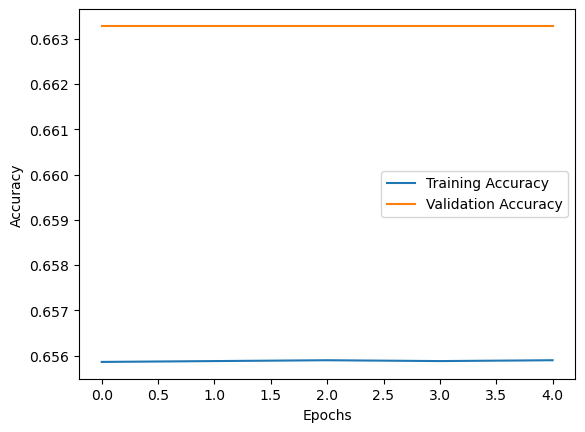

In [153]:
# Print the training curve
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# I ran the model again. It improved the accuracy for the first 5 epochs. For the next 5 epochs(shown below), there is no change in accuracy. 

# Result analysis

In [154]:
# Custom_objects dictionary to include TFBertModel
custom_objects = {'TFBertModel': TFBertModel}

best_model = tf.keras.models.load_model(best_sentiment_model, custom_objects=custom_objects)

# Evaluate on the test set using the previously prepared test_padded
test_loss, test_accuracy = best_model.evaluate(test_padded, label_encoder.transform(test_data['sentiment']))
print(f'Test Accuracy: {test_accuracy}')


639/639 [==============================] - 345s 535ms/step - loss: 0.8296 - accuracy: 0.6454
Test Accuracy: 0.6454376578330994


What are the impacts of hyper-parameters, such as the hidden dimension and the number of attention layers, on the Transformer?

The hyperparameters have a significant impact on the model's performance.

Hidden Dimension: If there are more hidden dimensions, then it increases the computational cost, both in terms of memory requirements and processing time. Larger hidden dimensions may require more resources for training the data. 


Number of Attention Layers: The number of attention layers determines how much each position in the input sequence attends to other positions. Increasing the number of attention heads also increases the computational cost.  

Additional Layers:  Additional layers increases the depth of the model. A deeper model may capture more complex hierarchical relationships in the data.

Dropout Rate: The dropout rate is a regularization technique that helps prevent overfitting by randomly dropping out units during training. A moderate dropout rate can improve the model's generalization ability and stability during training.

#### WordCloud on cleaned data

In [155]:
title_words = list(data["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)


[('video', 4076),
 ('vs', 3123),
 ('official', 3063),
 ('minecraft', 2449),
 ('highlights', 2253),
 ('résumé', 1721),
 ('jai', 1522),
 ('ft', 1353),
 ('oficial', 1270),
 ('shorts', 1215),
 ('league', 1127),
 ('fc', 1079),
 ('fortnite', 1079),
 ('game', 1040),
 ('x', 968),
 ('france', 962),
 ('trailer', 960),
 ('clip', 916),
 ('music', 913),
 ('officiel', 882),
 ('feat', 861),
 ('dazn', 859),
 ('fait', 794),
 ('real', 781),
 ('resumen', 731)]

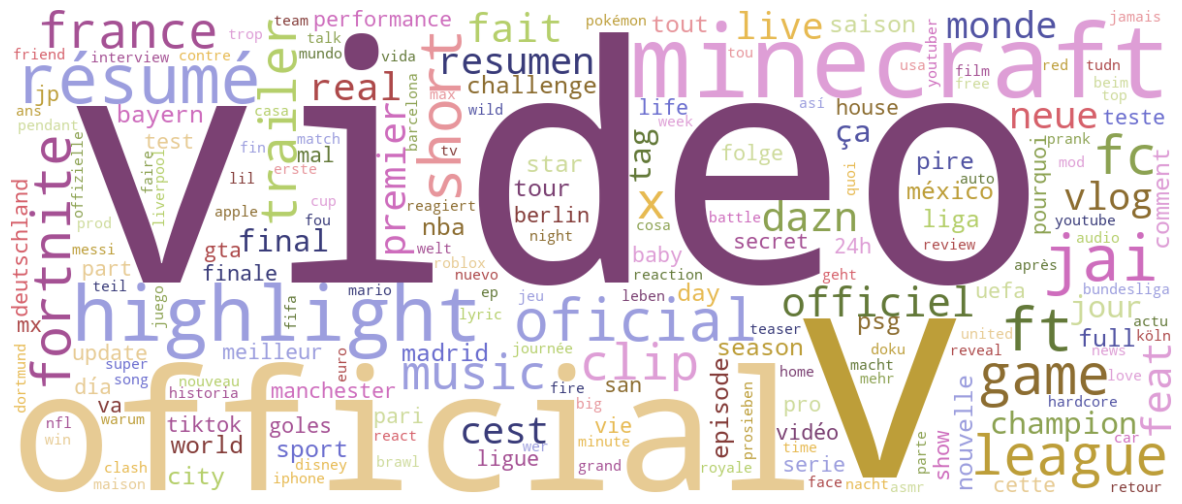

In [156]:
wc = WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")
